# Sedatives
The survey also was interested about the use of sedatives or barbiturates. 
These drugs are also called "downers," or "sleeping pills that were not prescribed for a person, or that a person took only for the experience or feeling the drugs caused.

In [5]:
#disable some annoying warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#plots the figures in place instead of a new window
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

In [6]:
#data is a tsv file therefore read it as a csv file with \t as the seperator
dataset = pd.read_csv('data/drugs-dataset.tsv', delimiter = '\t')

In [7]:
case_quest_data = dataset.ix[:,0:2].copy()
sedatives = dataset.ix[:,'METHAQ':'SVDAYPWK'].copy() # sedatives dataset

### 1. How many cases used the drug
There are 741 cases who use sedatives and 54200 cases who never use sedatives in the survey. There are few people who ever used sedatives.

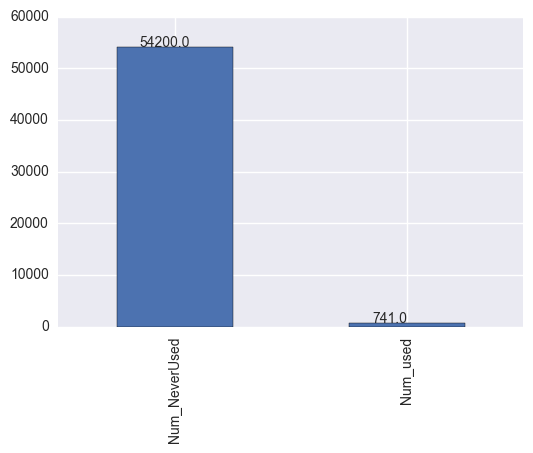

In [8]:

Num_NeverUsed=sedatives.query('METHAQ ==91').shape[0]
Num_used=sedatives.query('(METHAQ ==1)|(NEMBBARB ==1)|(RESTTMAZ ==1)|(SEDCARD ==1)').shape[0]
Num =  {"Num":{"Num_NeverUsed":Num_NeverUsed, "Num_used":Num_used }}
DF_Num=pd.DataFrame(Num).sort_values('Num', ascending = False)
ax = DF_Num['Num'].plot.bar()
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.1 , p.get_height()+50))


###  2.What are their age range?

Since there are few people who ever used sedatives, the lines are marginal and sharp.
They focused on 15 years old.

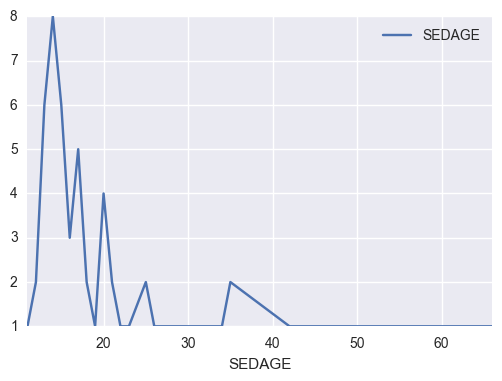

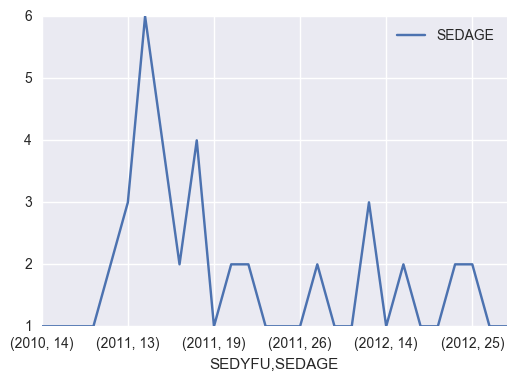

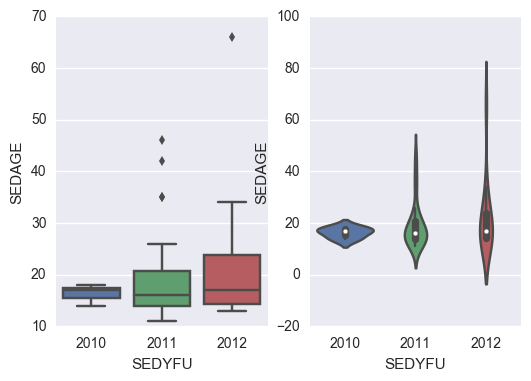

In [11]:
#query_data those who have used any one of the hallucinogens
sedatives_1=sedatives.query('((METHAQ ==1)|(NEMBBARB ==1)|(RESTTMAZ ==1)|(SEDCARD ==1))&(SEDAGE <69)&(SEDYFU<=2013)')
count = sedatives_1.groupby('SEDAGE').agg({ 'SEDAGE': 'count'})
count.plot()

#hallucinogens_LSD.plot(kind='scatter', x='HALLAGE',y='LSD')

# year & age
count_year = sedatives_1.groupby(['SEDYFU','SEDAGE']).agg({ 'SEDAGE': 'count'})
count_year.plot()

sedatives_1.plot(kind='scatter', x='SEDYFU',y='SEDAGE')

#playing with categories ... seaborn is pretty good with it
#plt.figure(figsize=(40,20))
plt.subplot(121)
sns.boxplot(x='SEDYFU',y='SEDAGE',data=sedatives_1)
plt.subplot(122)
sns.violinplot(x='SEDYFU',y='SEDAGE',data=sedatives_1)


### 3.How frequently they use it?

They used sedative 1-15 times per year, which is not frequent.

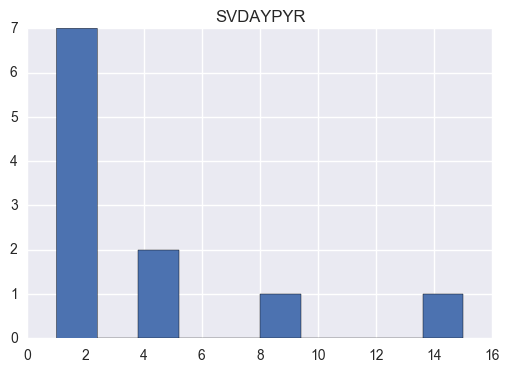

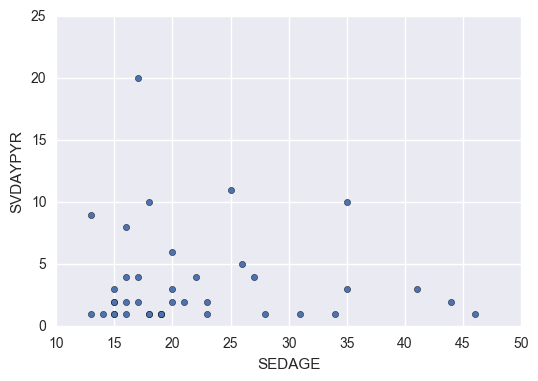

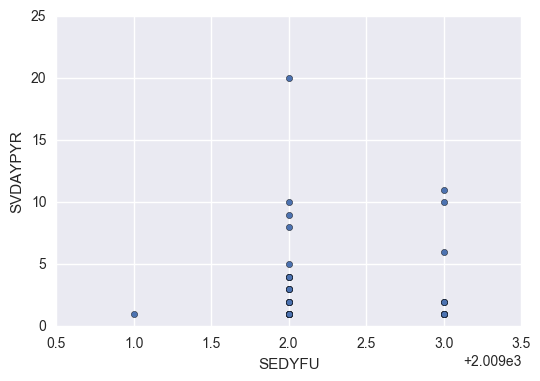

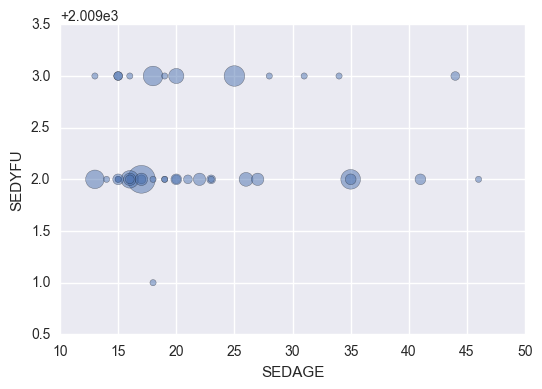

In [13]:
sedatives_fre=sedatives.query('(SVDAYPYR<985)&(SEDAGE <=69)& (SEDYFU<=2012)')
count_days = sedatives_fre.groupby('SVDAYPYR').agg({ 'SVDAYPYR': 'count'})
count_days.hist()

sedatives_fre.plot(kind='scatter', x='SEDAGE',y='SVDAYPYR')
sedatives_fre.plot(kind='scatter', x='SEDYFU',y='SVDAYPYR')
sedatives_fre.plot(kind='scatter', x='SEDAGE',y='SEDYFU',s=sedatives_fre['SVDAYPYR']*20,alpha=0.5)

### 4.Did they stop and go back to it? Are they planning to quit?

* 1 = Within the past 30 days
* 2 = More than 30 days ago but within the past 12 mons
* 3 = More than 12 months ago 

There are 731 cases who quit the drug , 95 cases who used the drug within the past 342 days and 63 cases who used the drug more than 30 days in the past year. 

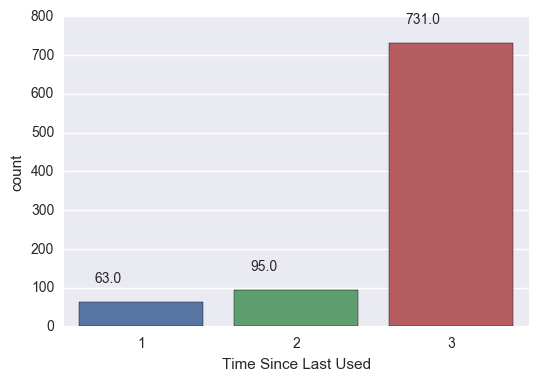

In [15]:
sedatives_quit=sedatives.query('SEDREC<4')
ax = sns.countplot(sedatives_quit['SEDREC'])
plt.xlabel('Time Since Last Used')
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

## Next

[Results](Results.ipynb)